Import Statements

In [1]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
from geopy.geocoders import Nominatim

In [5]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

In [6]:
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 6.0 MB/s  eta 0:00:01


In [7]:
import folium

Get HTML from the URL

In [8]:
url = 'https://en.wikipedia.org/wiki/Neighborhoods_in_Washington,_D.C.'
html_data  = requests.get(url).text 
soup = BeautifulSoup(html_data,"html5lib")

Create a dataframe with the data from the Wikipedia page. Parse the table and extract the ward and neighborhood

In [9]:
dc_data = pd.DataFrame(columns=["Ward", "Neighborhood", "Latitude", "Longitude"])
dc_data

,Ward,Neighborhood,Latitude,Longitude


In [10]:
geolocator = Nominatim(user_agent="dc_explorer")

In [22]:
for heading in soup.find_all("h3"):
    if ("Ward" not in heading.text):
        break
    #print(heading.text.strip().split("[", maxsplit=1)[0])
    ward = heading.text.strip().split("[", maxsplit=1)[0]
    print(ward)
    for listitem in heading.findNext("ul").find_all("li"):
        #print(listitem.text.split("(", maxsplit=1)[0].strip())
        neighborhood = listitem.text.split("(", maxsplit=1)[0].strip()
        if("U Street" in neighborhood):
            neighborhood = "U Street"
        address = f"{neighborhood}, Washington DC"
        #print (address)
        location = geolocator.geocode(address)
        if (location is None):
            print(f"skipped {neighborhood}")
            continue
        print(location)
        latitude = location.latitude
        longitude = location.longitude
        dc_data = dc_data.append({"Ward":ward, "Neighborhood":neighborhood, "Latitude":latitude, "Longitude":longitude}, ignore_index=True)
dc_data

Ward 1
Adams Morgan, Washington, District of Columbia, United States
Columbia Heights, Washington, District of Columbia, United States
Howard University, V Street Northwest, Cardozo/Shaw, Washington, District of Columbia, 20060, United States
Kalorama Heights, Washington, District of Columbia, United States
LeDroit Park, Common Good Community Farm, Common Good Farm, Washington, District of Columbia, United States
Lanier Heights, Washington, District of Columbia, United States
Mount Pleasant, Washington, District of Columbia, United States
Park View, Washington, District of Columbia, United States
Pleasant Plains, Washington, District of Columbia, United States
Shaw, Washington, District of Columbia, 20001, United States
U Street, Glover Park, Washington, District of Columbia, 20007, United States
Ward 2
Burleith/Hillandale, Washington, District of Columbia, 20007, United States
Chinatown, Washington, District of Columbia, 20220, United States
Downtown, Washington, District of Columbia,

,Ward,Neighborhood,Latitude,Longitude
0,Ward 1,Adams Morgan,38.921500,-77.042199
1,Ward 1,Columbia Heights,38.928185,-77.031923
2,Ward 1,Howard University,38.921525,-77.019536
3,Ward 1,Kalorama,38.916778,-77.052477
4,Ward 1,LeDroit Park,38.918002,-77.016145
...,...,...,...,...
267,Ward 8,Garfield Heights,38.854924,-76.972829
268,Ward 8,Knox Hill,38.852252,-76.969206
269,Ward 8,Shipley Terrace,38.847335,-76.969142
270,Ward 8,Washington Highlands,38.832057,-76.994698


In [23]:
dc_data.to_csv("dclocationdata.csv")

In [11]:
# The code was removed by Watson Studio for sharing.

In [12]:
dc_data.head(10)

,Ward,Neighborhood,Latitude,Longitude
0,Ward 1,Adams Morgan,38.921500,-77.042199
1,Ward 1,Columbia Heights,38.928185,-77.031923
2,Ward 1,Howard University,38.921525,-77.019536
3,Ward 1,Kalorama,38.916778,-77.052477
4,Ward 1,LeDroit Park,38.918002,-77.016145
5,Ward 1,Lanier Heights,38.926500,-77.039977
6,Ward 1,Mount Pleasant,38.930667,-77.040810
7,Ward 1,Park View,38.933469,-77.021301
8,Ward 1,Pleasant Plains,38.929407,-77.022834
9,Ward 1,Shaw,38.912056,-77.021365


Map Washington DC

In [13]:
geolocator = Nominatim(user_agent="dc_explorer")
address = "Washington, DC"
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Washington, DC are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Washington, DC are 38.8949924, -77.0365581.


Create map of Washington DC using lat and long values

In [11]:
map_dc = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dc_data['Latitude'], dc_data['Longitude'], dc_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dc)  
    
map_dc

Utilize the Foursquare API to explore the neighborhoods and segment them

In [12]:
# The code was removed by Watson Studio for sharing.

In [13]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get top 100 venues for each neighborhood

In [16]:
dc_venues = getNearbyVenues(names=dc_data['Neighborhood'],
                                   latitudes=dc_data['Latitude'],
                                   longitudes=dc_data['Longitude']
                                  )

In [17]:
print(dc_venues.shape)
dc_venues.head()

(3022, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams Morgan,38.9215,-77.042199,Lapis,38.921302,-77.043890,Afghan Restaurant
1,Adams Morgan,38.9215,-77.042199,The LINE Hotel,38.922815,-77.041688,Hotel
2,Adams Morgan,38.9215,-77.042199,Donburi,38.921673,-77.042385,Japanese Restaurant
3,Adams Morgan,38.9215,-77.042199,The Green Zone,38.919483,-77.041845,Cocktail Bar
4,Adams Morgan,38.9215,-77.042199,Tryst,38.921947,-77.042168,Coffee Shop


Check how many venues were returned for each neighborhood

In [18]:
dc_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adams Morgan,53,53,53,53,53,53
American University Park,13,13,13,13,13,13
Anacostia,7,7,7,7,7,7
Arboretum,12,12,12,12,12,12
Barnaby Woods,4,4,4,4,4,4
...,...,...,...,...,...,...
Woodland,6,6,6,6,6,6
Woodland Normanstone,4,4,4,4,4,4
Woodley Park,37,37,37,37,37,37


Find out how many unique categories were returned

In [19]:
print('There are {} uniques categories.'.format(len(dc_venues['Venue Category'].unique())))

There are 305 uniques categories.


In [20]:
# one hot encoding
dc_onehot = pd.get_dummies(dc_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
dc_onehot['Neighborhood'] = dc_venues['Neighborhood'] 

dc_onehot.columns.get_loc("Neighborhood")
cols = list(dc_onehot)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Neighborhood')))
dc_onehot = dc_onehot.loc[:, cols]
dc_onehot

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Adams Morgan,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adams Morgan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adams Morgan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adams Morgan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adams Morgan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,Woodland,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3018,Woodland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3019,Woodland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3020,Woodland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dc_grouped = dc_onehot.groupby('Neighborhood').mean().reset_index()
dc_grouped

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Adams Morgan,0.0,0.0,0.018868,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.018868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,American University Park,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Anacostia,0.0,0.0,0.000000,0.0,0.142857,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Arboretum,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Barnaby Woods,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Woodland,0.0,0.0,0.000000,0.0,0.000000,0.0,0.166667,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
121,Woodland Normanstone,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
122,Woodley Park,0.0,0.0,0.027027,0.0,0.027027,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054054
123,"Woodmont, Washington, D.C.",0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Print each neighborhood along with the top 5 most common venues

In [22]:
num_top_venues = 5

for hood in dc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dc_grouped[dc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adams Morgan----
                venue  freq
0         Coffee Shop  0.06
1               Diner  0.04
2  Italian Restaurant  0.04
3        Cocktail Bar  0.04
4           BBQ Joint  0.04


----American University Park----
                venue  freq
0         Coffee Shop  0.15
1                Bank  0.15
2  Seafood Restaurant  0.08
3       Deli / Bodega  0.08
4              Market  0.08


----Anacostia----
                 venue  freq
0        Grocery Store  0.14
1                  Gym  0.14
2  American Restaurant  0.14
3       Sandwich Place  0.14
4    Convenience Store  0.14


----Arboretum----
                  venue  freq
0                Garden  0.17
1          Intersection  0.08
2                 Hotel  0.08
3  Fast Food Restaurant  0.08
4      Basketball Court  0.08


----Barnaby Woods----
                  venue  freq
0                  Park  0.25
1  Gym / Fitness Center  0.25
2             BBQ Joint  0.25
3                 Field  0.25
4                Office  0.00


----Barn

Function to sort the venues in descending order.

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create new dataframe and display the top 10 venues for each neighborhood.

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dc_grouped['Neighborhood']

for ind in np.arange(dc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams Morgan,Coffee Shop,BBQ Joint,Italian Restaurant,Mediterranean Restaurant,Diner,Bar,Ice Cream Shop,Asian Restaurant,Cocktail Bar,Karaoke Bar
1,American University Park,Coffee Shop,Bank,BBQ Joint,Pizza Place,Seafood Restaurant,Deli / Bodega,Pharmacy,Market,Furniture / Home Store,Italian Restaurant
2,Anacostia,Convenience Store,History Museum,Sandwich Place,Grocery Store,Gym,Boutique,American Restaurant,Flower Shop,Empanada Restaurant,Entertainment Service
3,Arboretum,Garden,Hotel,Automotive Shop,Botanical Garden,Storage Facility,Fast Food Restaurant,Chinese Restaurant,Brewery,Basketball Court,Intersection
4,Barnaby Woods,Park,BBQ Joint,Field,Gym / Fitness Center,Zoo Exhibit,Falafel Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space
5,Barney Circle,Sandwich Place,Intersection,Coffee Shop,Snack Place,Food Court,Fast Food Restaurant,Bike Rental / Bike Share,Gas Station,Cocktail Bar,Baseball Field
6,Barry Farm,Bus Stop,Convenience Store,Intersection,Metro Station,Rental Car Location,Basketball Court,Farm,Entertainment Service,Escape Room,Ethiopian Restaurant
7,Bellevue,Baseball Field,Playground,Chinese Restaurant,Basketball Court,Falafel Restaurant,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space
8,Benning,Fried Chicken Joint,Thai Restaurant,Discount Store,Fast Food Restaurant,Cosmetics Shop,Shopping Mall,Liquor Store,Sandwich Place,Gas Station,Donut Shop
9,Benning Heights,Convenience Store,Chinese Restaurant,Gas Station,Basketball Court,Zoo Exhibit,Farm,Escape Room,Ethiopian Restaurant,Event Space,Exhibit


In [26]:
dc_grouped_clustering = dc_grouped.drop('Neighborhood', 1)


Run k-means to cluster the neighborhoods into 5 clusters.

In [27]:
#choose optimal K


Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(dc_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

In [28]:
Sum_of_squared_distances

[22.510641250436926,
 20.46807209972939,
 19.48901464978867,
 18.493008650924033,
 17.454532286824332,
 16.644369757195367,
 15.645882029862992,
 14.511510241168967,
 13.5396412818213,
 12.92347327142329,
 11.958709394332953,
 11.321640413167714,
 10.801128817957155,
 10.488576560011998]

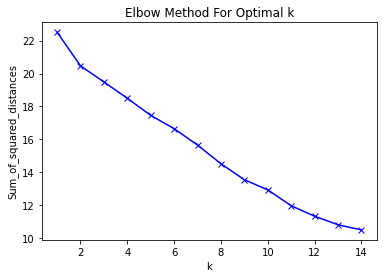

In [29]:
#plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


There isn't a clear elbow.  Selecting 6 clusters.

In [30]:
# set number of clusters
kclusters = 6

#dc_grouped_clustering = dc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:6] 

array([3, 3, 3, 3, 3, 3], dtype=int32)

In [31]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 1, 3, 0, 3, 3, 2, 0, 3, 0, 3, 4,
       3, 1, 3, 0, 3, 3, 3, 3, 0, 4, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 0, 1, 0, 1, 3, 1, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 1, 3,
       0, 0, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 0, 3, 3, 3, 4, 5,
       3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 1, 3, 3, 3, 3], dtype=int32)

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dc_merged = dc_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
dc_merged = dc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')




In [33]:
dc_merged 

,Ward,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ward 1,Adams Morgan,38.921500,-77.042199,3.0,Coffee Shop,BBQ Joint,Italian Restaurant,Mediterranean Restaurant,Diner,Bar,Ice Cream Shop,Asian Restaurant,Cocktail Bar,Karaoke Bar
1,Ward 1,Columbia Heights,38.928185,-77.031923,3.0,Bakery,Gym,Mexican Restaurant,Latin American Restaurant,Pizza Place,Café,Park,Wine Shop,Dive Bar,Kids Store
2,Ward 1,Howard University,38.921525,-77.019536,3.0,Sandwich Place,Caribbean Restaurant,Pool,Baseball Field,Reservoir,Coffee Shop,College Library,Cosmetics Shop,Pizza Place,Park
3,Ward 1,Kalorama,38.916778,-77.052477,3.0,Park,Hotel,History Museum,Trail,Sushi Restaurant,Scenic Lookout,Field,Fast Food Restaurant,Farmers Market,Farm
4,Ward 1,LeDroit Park,38.918002,-77.016145,3.0,Café,Liquor Store,Cocktail Bar,Pizza Place,Dive Bar,Shipping Store,Seafood Restaurant,Food & Drink Shop,Eastern European Restaurant,Gas Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Ward 8,Garfield Heights,38.854924,-76.972829,1.0,Museum,Park,Art Gallery,Bus Stop,Zoo Exhibit,Farmers Market,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant
132,Ward 8,Knox Hill,38.852253,-76.969206,0.0,Convenience Store,Caribbean Restaurant,Bus Stop,Liquor Store,Athletics & Sports,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant
133,Ward 8,Shipley Terrace,38.847335,-76.969142,0.0,Pool,Athletics & Sports,Convenience Store,American Restaurant,Liquor Store,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant
134,Ward 8,Washington Highlands,38.832057,-76.994698,0.0,Basketball Court,Liquor Store,Grocery Store,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant


visualize the resulting clusters

In [66]:
dc_merged.describe()

,Latitude,Longitude,Cluster Labels
count,272.000000,272.000000,262.000000
mean,38.917728,-77.027257,2.469466
std,0.028981,0.041793,1.780326
min,38.826532,-77.101367,0.000000
25%,38.903163,-77.055396,2.000000
50%,38.919473,-77.028011,2.000000
75%,38.932991,-77.005798,2.000000
max,38.987016,-76.917245,10.000000


In [34]:
dc_merged.shape

(136, 15)

In [35]:
dc_merged.dropna(inplace=True)

In [36]:
dc_merged.shape

(132, 15)

In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dc_merged['Latitude'], dc_merged['Longitude'], dc_merged['Neighborhood'], dc_merged['Cluster Labels']):
    #print(poi,cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examine Clusters

In [55]:
dc_merged

,Ward,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ward 1,Adams Morgan,38.921500,-77.042199,4.0,Coffee Shop,Italian Restaurant,BBQ Joint,Mediterranean Restaurant,Cocktail Bar,Asian Restaurant,Bar,Ice Cream Shop,Diner,Lounge
1,Ward 1,Columbia Heights,38.928185,-77.031923,4.0,Bakery,Convenience Store,Park,Gym,Café,Mexican Restaurant,Pizza Place,Bus Station,Latin American Restaurant,South American Restaurant
2,Ward 1,Howard University,38.921525,-77.019536,4.0,Sandwich Place,Caribbean Restaurant,Hookah Bar,Tennis Court,Frozen Yogurt Shop,Fried Chicken Joint,Middle Eastern Restaurant,Non-Profit,Chinese Restaurant,Track
3,Ward 1,Kalorama,38.916778,-77.052477,3.0,Park,Trail,History Museum,Scenic Lookout,Sushi Restaurant,Zoo Exhibit,Event Space,Eastern European Restaurant,Electronics Store,Empanada Restaurant
4,Ward 1,LeDroit Park,38.918002,-77.016145,4.0,Café,Liquor Store,Cocktail Bar,Food & Drink Shop,Italian Restaurant,Shipping Store,Seafood Restaurant,Eastern European Restaurant,Dog Run,Gas Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Ward 8,Garfield Heights,38.854924,-76.972829,3.0,Wings Joint,Museum,Park,Art Gallery,Zoo Exhibit,Farmers Market,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space
132,Ward 8,Knox Hill,38.852253,-76.969206,0.0,Convenience Store,Liquor Store,Grocery Store,Pizza Place,Exhibit,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space
133,Ward 8,Shipley Terrace,38.847335,-76.969142,0.0,Pool,Convenience Store,American Restaurant,Liquor Store,Athletics & Sports,Farmers Market,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space
134,Ward 8,Washington Highlands,38.832057,-76.994698,0.0,Costume Shop,Grocery Store,Liquor Store,Basketball Court,Zoo Exhibit,Falafel Restaurant,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space


Cluster Distribution

In [53]:
dc_merged['Cluster Labels'].value_counts()

4.0    83
0.0    30
3.0    15
1.0     2
2.0     1
5.0     1
Name: Cluster Labels, dtype: int64

In [59]:
#Cluster 1
#convenience and liquor stores very popular
dc_merged.loc[dc_merged['Cluster Labels'] == 0, dc_merged.columns[[0] + [1] + list(range(5, dc_merged.shape[1]))]]

,Ward,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,Ward 4,Fort Totten,Convenience Store,Gym,Residential Building (Apartment / Condo),Park,Shipping Store,Bus Station,Metro Station,Liquor Store,Mobile Phone Shop,Home Service
60,Ward 4,Shepherd Park,Ethiopian Restaurant,Convenience Store,Sandwich Place,South American Restaurant,Bank,Liquor Store,Department Store,Lounge,Exhibit,Escape Room
64,Ward 5,Brentwood,Liquor Store,Drugstore,Plaza,Asian Restaurant,Chinese Restaurant,Restaurant,Grocery Store,Recreation Center,Garden Center,Sandwich Place
69,Ward 5,Fort Totten,Convenience Store,Gym,Residential Building (Apartment / Condo),Park,Shipping Store,Bus Station,Metro Station,Liquor Store,Mobile Phone Shop,Home Service
70,Ward 5,Gateway,Liquor Store,Thrift / Vintage Store,Massage Studio,Gas Station,Shipping Store,Business Service,Residential Building (Apartment / Condo),Currency Exchange,Playground,Fast Food Restaurant
75,Ward 5,Pleasant Hill,Bus Stop,Convenience Store,Sandwich Place,College Rec Center,Dance Studio,Farmers Market,Escape Room,Ethiopian Restaurant,Event Space,Exhibit
76,Ward 5,Queens Chapel,Liquor Store,Convenience Store,Chinese Restaurant,Grocery Store,Gas Station,Fried Chicken Joint,Zoo Exhibit,Exhibit,Escape Room,Ethiopian Restaurant
78,Ward 5,Stronghold,Convenience Store,Grocery Store,Park,Bus Stop,Food Truck,Tennis Court,Lawyer,Credit Union,Historic Site,Exhibit
79,Ward 5,Trinidad,Breakfast Spot,Gym,Sandwich Place,Convenience Store,Moving Target,Bar,Liquor Store,Park,New American Restaurant,Escape Room
85,Ward 6,Kingman Park,Intersection,Convenience Store,Fried Chicken Joint,Liquor Store,Hostel,Grocery Store,Discount Store,Park,Chinese Restaurant,Café


In [60]:
#Cluster 2
dc_merged.loc[dc_merged['Cluster Labels'] == 1, dc_merged.columns[[0] + [1] + list(range(5, dc_merged.shape[1]))]]

,Ward,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Ward 3,Chevy Chase,Farmers Market,Zoo Exhibit,Eastern European Restaurant,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Fast Food Restaurant
52,Ward 4,Chevy Chase,Farmers Market,Zoo Exhibit,Eastern European Restaurant,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Fast Food Restaurant


In [61]:
#Cluster 3
dc_merged.loc[dc_merged['Cluster Labels'] == 2, dc_merged.columns[[0] + [1] + list(range(5, dc_merged.shape[1]))]]

,Ward,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
118,Ward 7,Northeast Boundary,Liquor Store,Zoo Exhibit,Farmers Market,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Fast Food Restaurant


In [62]:
#Cluster 4
#parks and playgrounds very popular
dc_merged.loc[dc_merged['Cluster Labels'] == 3, dc_merged.columns[[0] + [1] + list(range(5, dc_merged.shape[1]))]]

,Ward,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Ward 1,Kalorama,Park,Trail,History Museum,Scenic Lookout,Sushi Restaurant,Zoo Exhibit,Event Space,Eastern European Restaurant,Electronics Store,Empanada Restaurant
27,Ward 3,Berkley,Yoga Studio,Park,Deli / Bodega,Farmers Market,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant
33,Ward 3,Foxhall,Museum,Playground,Zoo Exhibit,Falafel Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit
39,Ward 3,North Cleveland Park,Bus Stop,Park,Playground,Gas Station,Zoo Exhibit,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit
42,Ward 3,Potomac Heights,Park,Playground,Art Gallery,History Museum,Performing Arts Venue,Deli / Bodega,Zoo Exhibit,Falafel Restaurant,Empanada Restaurant,Escape Room
49,Ward 4,Barnaby Woods,Park,Gym / Fitness Center,BBQ Joint,Field,Zoo Exhibit,Exhibit,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space
68,Ward 5,Fort Lincoln,Gas Station,Convenience Store,Park,Playground,Fried Chicken Joint,Exhibit,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant
94,Ward 7,Benning Ridge,Convenience Store,Park,Insurance Office,Burger Joint,Zoo Exhibit,Falafel Restaurant,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space
98,Ward 7,Central Northeast,Park,Zoo Exhibit,Falafel Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Farmers Market
104,Ward 7,Fairlawn,Basketball Court,Sandwich Place,Park,Deli / Bodega,Liquor Store,Falafel Restaurant,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space


In [63]:
#Cluster 5
#coffee shops very popular
dc_merged.loc[dc_merged['Cluster Labels'] == 4, dc_merged.columns[[0] + [1] + list(range(5, dc_merged.shape[1]))]]

,Ward,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ward 1,Adams Morgan,Coffee Shop,Italian Restaurant,BBQ Joint,Mediterranean Restaurant,Cocktail Bar,Asian Restaurant,Bar,Ice Cream Shop,Diner,Lounge
1,Ward 1,Columbia Heights,Bakery,Convenience Store,Park,Gym,Café,Mexican Restaurant,Pizza Place,Bus Station,Latin American Restaurant,South American Restaurant
2,Ward 1,Howard University,Sandwich Place,Caribbean Restaurant,Hookah Bar,Tennis Court,Frozen Yogurt Shop,Fried Chicken Joint,Middle Eastern Restaurant,Non-Profit,Chinese Restaurant,Track
4,Ward 1,LeDroit Park,Café,Liquor Store,Cocktail Bar,Food & Drink Shop,Italian Restaurant,Shipping Store,Seafood Restaurant,Eastern European Restaurant,Dog Run,Gas Station
5,Ward 1,Lanier Heights,Coffee Shop,Ice Cream Shop,Asian Restaurant,Taco Place,Spanish Restaurant,Spa,Latin American Restaurant,Liquor Store,Yoga Studio,Italian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
121,Ward 7,River Terrace,Gas Station,Grocery Store,Food & Drink Shop,Liquor Store,Food Truck,Dance Studio,Rental Car Location,Trail,Market,Shopping Mall
122,Ward 7,Skyland,Coffee Shop,Fried Chicken Joint,Pharmacy,Fast Food Restaurant,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant
126,Ward 8,Bellevue,Baseball Field,Playground,Chinese Restaurant,Basketball Court,Food,Exhibit,Electronics Store,Empanada Restaurant,Food & Drink Shop,Escape Room
128,Ward 8,Congress Heights,Ice Cream Shop,Deli / Bodega,Fast Food Restaurant,Fried Chicken Joint,Liquor Store,Park,Road,Breakfast Spot,IT Services,Intersection


In [64]:
#Cluster 6
dc_merged.loc[dc_merged['Cluster Labels'] == 5, dc_merged.columns[[0] + [1] + list(range(5, dc_merged.shape[1]))]]

,Ward,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
111,Ward 7,Hillcrest,Intersection,Zoo Exhibit,Fast Food Restaurant,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market
